# **Predição de Boletos - Verdadeiros ou Falsos**

## **Contextualização**

O objetivo deste projeto é desenvolver um modelo de machine learning capaz de prever se um boleto bancário é verdadeiro ou falso, com base em suas características principais.

### **Motivação**
Boletos falsos representam um risco financeiro tanto para consumidores quanto para empresas. Um modelo automático de verificação pode agilizar processos de segurança, reduzir fraudes e melhorar a experiência dos usuários.

### **Descrição dos Dados**
O conjunto de dados (`completos.json`) contém informações extraídas dos boletos, como:
- Banco emissor
- Código do banco
- Agência
- Valor
- Linha digitável (informações de pagamento)

Esses dados serão pré-processados para extrair variáveis relevantes para o modelo.

### **Metodologia**
- **Pré-processamento:** Limpeza dos dados e extração de variáveis úteis da linha digitável.
- **Transformação:** Conversão de variáveis categóricas para valores numéricos.
- **Treinamento:** Utilizaremos um modelo de **Random Forest Classifier**, conhecido por sua robustez em dados tabulares.
- **Avaliação:** Mediremos a acurácia e o desempenho geral em um conjunto de teste.
- **Aplicação:** Salvaremos o modelo para utilizar em uma aplicação interativa feita com **Streamlit**, permitindo predizer novos boletos em tempo real.



## 1. Importação de Bibliotecas
Importamos as bibliotecas necessárias para manipular os dados e treinar o modelo.

In [31]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from lazypredict.Supervised import LazyClassifier


## 2. Carregamento dos Dados
Carregamos o arquivo completos.json, que contém os dados dos boletos.

In [32]:
with open("completos.json", "r", encoding="utf-8") as f:
    dados = json.load(f)

df = pd.DataFrame(dados)
df.head()

,banco,codigoBanco,agencia,valor,linhaDigitavel,classe
0,Itaú,341,0773,890.00,34190.00000 00000.000000 00000.000000 0 000000...,caracteristicasVerdadeiras
1,Itaú,341,0773,467.00,34190.00000 00000.000000 00000.000000 0 000000...,caracteristicasVerdadeiras
2,Itaú,341,0773,230.00,34190.00000 00000.000000 00000.000000 0 000000...,caracteristicasVerdadeiras
3,Itaú,341,0773,986.00,34190.00000 00000.000000 00000.000000 0 000000...,caracteristicasVerdadeiras
4,Itaú,341,0773,766.00,34190.00000 00000.000000 00000.000000 0 000000...,caracteristicasVerdadeiras


## 3. Pré-processamento dos Dados
Realizamos o tratamento da coluna linhaDigitavel para extrair informações relevantes.

In [33]:
df['linhaDigitavel'] = df['linhaDigitavel'].str.replace(" ", "").astype(str)
df['linha_codBanco'] = df['linhaDigitavel'].str.slice(0, 3)
df['linha_moeda'] = df['linhaDigitavel'].str.slice(3, 4)
df['linha_valor'] = df['linhaDigitavel'].str.slice(-10)

df.drop(columns=['linhaDigitavel'], inplace=True)
df.head()

,banco,codigoBanco,agencia,valor,classe,linha_codBanco,linha_moeda,linha_valor
0,Itaú,341,0773,890.00,caracteristicasVerdadeiras,341,9,0000089000
1,Itaú,341,0773,467.00,caracteristicasVerdadeiras,341,9,0000046700
2,Itaú,341,0773,230.00,caracteristicasVerdadeiras,341,9,0000023000
3,Itaú,341,0773,986.00,caracteristicasVerdadeiras,341,9,0000098600
4,Itaú,341,0773,766.00,caracteristicasVerdadeiras,341,9,0000076600


## 4. Transformação da Coluna Alvo
Transformamos as classes textuais em valores numéricos para o modelo poder trabalhar.

In [34]:
df['classe'] = df['classe'].map({
    "caracteristicasVerdadeiras": 1,
    "caracteristicasFalsas": 0
})


## 5. Codificação da Coluna 'banco'
Convertendo os nomes dos bancos em números, pois o modelo só entende dados numéricos.

In [35]:
df['banco'] = df['banco'].map({
    "Banco do Brasil": 0,
    "Itaú": 1,
    "Bradesco": 2,
    "Santander": 3,
    "Caixa Econômica": 4,
})

## 6. Separação de Variáveis
Definimos X como as variáveis independentes (features) e y como a variável alvo (classe).

In [36]:
X = df.drop(columns=['classe'])
y = df['classe']

## 7. Divisão em Treino e Teste, Treinamento e Avaliação do Modelo
Dividimos os dados em conjunto de treino (80%) e teste (20%) para avaliar o desempenho do modelo. Treinamos o modelo usando o algoritmo Random Forest Classifier. Calculamos a acurácia e mostramos um relatório detalhado da performance do modelo.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.81
              precision    recall  f1-score   support

           0       0.91      0.72      0.80        54
           1       0.74      0.91      0.82        46

    accuracy                           0.81       100
   macro avg       0.82      0.82      0.81       100
weighted avg       0.83      0.81      0.81       100



In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [19]:
from lazypredict.Supervised import CLASSIFIERS

In [38]:
lista_modelos = print(sorted(CLASSIFIERS))


[('AdaBoostClassifier', <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>), ('BaggingClassifier', <class 'sklearn.ensemble._bagging.BaggingClassifier'>), ('BernoulliNB', <class 'sklearn.naive_bayes.BernoulliNB'>), ('CalibratedClassifierCV', <class 'sklearn.calibration.CalibratedClassifierCV'>), ('CategoricalNB', <class 'sklearn.naive_bayes.CategoricalNB'>), ('DecisionTreeClassifier', <class 'sklearn.tree._classes.DecisionTreeClassifier'>), ('DummyClassifier', <class 'sklearn.dummy.DummyClassifier'>), ('ExtraTreeClassifier', <class 'sklearn.tree._classes.ExtraTreeClassifier'>), ('ExtraTreesClassifier', <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>), ('FixedThresholdClassifier', <class 'sklearn.model_selection._classification_threshold.FixedThresholdClassifier'>), ('GaussianNB', <class 'sklearn.naive_bayes.GaussianNB'>), ('KNeighborsClassifier', <class 'sklearn.neighbors._classification.KNeighborsClassifier'>), ('LGBMClassifier', <class 'lightgbm.sklearn.LGBMClassi

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [51]:
custom_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}


🔎 Avaliando modelo: Logistic Regression

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.57      0.69        54
           1       0.64      0.89      0.75        46

    accuracy                           0.72       100
   macro avg       0.75      0.73      0.72       100
weighted avg       0.76      0.72      0.71       100



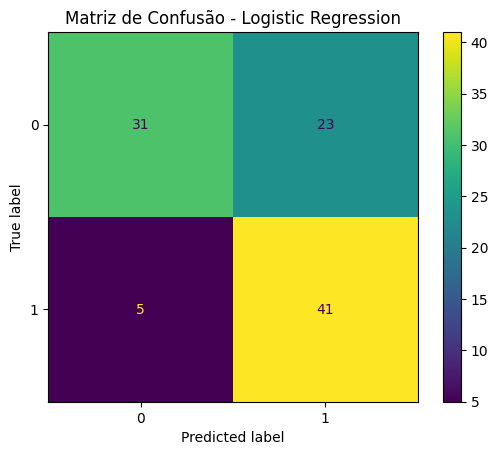


🔎 Avaliando modelo: Naive Bayes

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.15      0.26        54
           1       0.50      1.00      0.67        46

    accuracy                           0.54       100
   macro avg       0.75      0.57      0.46       100
weighted avg       0.77      0.54      0.45       100



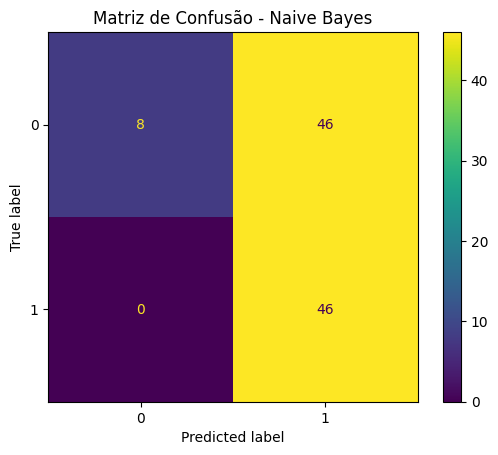


🔎 Avaliando modelo: Decision Tree

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        54
           1       0.74      0.85      0.79        46

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



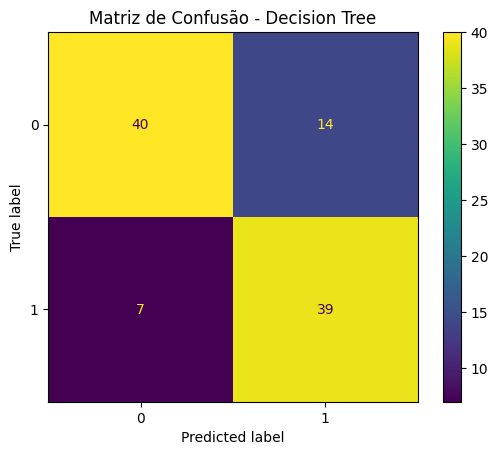

In [52]:
for nome, modelo in custom_models.items():
    print(f"\n🔎 Avaliando modelo: {nome}")

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Relatório de classificação
    print("\n📄 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Matriz de Confusão - {nome}")
    plt.show()

In [43]:
clf = LazyClassifier(custom_dict=custom_models, verbose=0 )#, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


print(models)

TypeError: LazyClassifier.__init__() got an unexpected keyword argument 'custom_dict'

## 8. Salvando o Modelo
Salvamos o modelo treinado usando a biblioteca pickle para ser usado depois no Streamlit.

In [61]:
import pickle
with open('modelo_boleto.pkl', 'wb') as f:
    pickle.dump(model, f)


Aqui apenas visualizamos as colunas do DataFrame e o conteúdo de uma linha para testes futuros.

In [62]:
df.columns
df.iloc[0]

banco                      1
codigoBanco              341
agencia                 0773
valor                 890.00
classe                     1
linha_codBanco           341
linha_moeda                9
linha_valor       0000089000
Name: 0, dtype: object

## 9. Aplicação com Streamlit
### Carregando o Modelo Salvo
Carregamos o modelo treinado para fazer predições em novos dados.
Definimos o título que será exibido na página Streamlit.
Criamos um exemplo de dado para realizar a predição usando o modelo carregado.

In [63]:
import streamlit as st

model = pickle.load(open('modelo_boleto.pkl', 'rb'))

st.title("Dataset Boleto - Predição de Verdadeiro ou Falso")

dado_teste = pd.DataFrame({'banco': [1.0], 'codigoBanco': [341],'agencia': [773], 'valor': [890.00], 'linha_codBanco': [341], 'linha_moeda': [9], 'linha_valor': [89000]})


2025-04-27 16:00:09.373 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 16:00:09.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


### Resultado da Predição
Realizamos a predição e exibimos o resultado.

In [64]:
pred = model.predict(dado_teste)

resultado = 'Verdadeiro' if pred[0] == 1 else 'Falso'
print(f"Resultado da predição para o dado teste: {resultado}")

Resultado da predição para o dado teste: Verdadeiro
